In [1]:
import pandas as pd
import numpy as np
import random
import math
import pickle
import csv
import decimal
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
from plotnine import *
from sklearn import preprocessing, manifold
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d
import ipywidgets as widgets
from IPython.display import display

## Data Import (Reformated data generated by unzip.Rmd) 

In [2]:
df = pd.read_csv ('./data/reformated_data.csv')
df = df.drop(df.columns[0], axis=1)

# dropping unknown dx = 0
df = df[df["dx"] > 0]

# putting dx = 3,4 into the Alz group
df.loc[df['dx'] == 3, 'dx'] = 2
df.loc[df['dx'] == 4, 'dx'] = 2

for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.loc[(df["age"] >= 64.9) & (df["age"] <= 95.9)]

diag = pd.DataFrame(df["dx"])
meas = df.loc[:, df.columns != 'dx']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(meas, diag, random_state = 749, test_size=0.2, stratify= diag)

x_train['group'] = "train"
x_test['group'] = "test"


df = pd.concat((pd.concat([x_test, y_test], axis=1),pd.concat([x_train, y_train], axis=1)), axis=0)
df

,DWIcorr,age,base,dataset,hand,scanner,session,sex,subject,tsb,...,b49_V24,b49_V25,b49_V26,b49_V27,b49_V28,b49_V29,b49_V30,b49_V31,group,dx
2126,0.937756,76.7,74.7,1,1,10,2127,0,929,2.0,...,1.02777,0.656558,NaN,0.179613,0.051275,0.086079,0.042904,0.013584,test,1
1084,0.879479,72.6,68.2,1,1,10,1085,0,471,4.4,...,1.07278,0.744323,0.011140,0.264644,0.075355,0.126583,0.063121,0.020007,test,1
1069,0.947022,68.8,68.8,1,1,10,1070,0,463,0.0,...,0.97740,0.647986,0.011558,0.196137,0.055935,0.093886,0.046788,0.014810,test,1
190,0.929810,72.8,70.7,1,2,10,191,1,83,2.1,...,1.06294,0.634210,0.013841,0.191299,0.054652,0.091747,0.045728,0.014478,test,1
257,0.928508,76.1,76.1,1,1,8,258,1,119,0.0,...,1.11871,0.694632,0.013562,0.173300,0.049497,0.083126,0.041444,0.013130,test,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,0.939765,81.9,77.8,1,1,10,2188,0,946,4.1,...,1.08505,0.677405,0.013096,0.184832,0.052749,0.088574,0.044155,0.013986,train,1
1060,0.935457,76.2,68.0,1,1,10,1061,0,460,8.2,...,1.07073,0.704780,NaN,0.189229,0.053994,0.090675,0.045206,0.014322,train,1
1039,0.870793,89.8,89.8,1,1,9,1040,0,450,0.0,...,1.13943,0.823279,0.010546,0.233477,0.066347,0.111512,0.055629,0.017649,train,2
1292,0.938102,75.4,67.4,1,1,10,1293,0,555,8.0,...,1.07669,0.691707,0.012451,0.218199,0.062214,0.104470,0.052081,0.016497,train,1


In [3]:
inserter = ['age', 'dx', 'group']

filter_b1 = inserter + [col for col in df if col.startswith('b1_')]
filter_b2 = inserter + [col for col in df if col.startswith('b2_')]
filter_b3 = inserter + [col for col in df if col.startswith('b3_')]
filter_b4 = inserter + [col for col in df if col.startswith('b4_')]
filter_b5 = inserter + [col for col in df if col.startswith('b5_')]
filter_b6 = inserter + [col for col in df if col.startswith('b6_')]
filter_b7 = inserter + [col for col in df if col.startswith('b7_')]
filter_b8 = inserter + [col for col in df if col.startswith('b8_')]
filter_b9 = inserter + [col for col in df if col.startswith('b9_')]
filter_b10 = inserter + [col for col in df if col.startswith('b10_')]

filter_b11 = inserter + [col for col in df if col.startswith('b11_')]
filter_b12 = inserter + [col for col in df if col.startswith('b12_')]
filter_b13 = inserter + [col for col in df if col.startswith('b13_')]
filter_b14 = inserter + [col for col in df if col.startswith('b14_')]
filter_b15 = inserter + [col for col in df if col.startswith('b15_')]
filter_b16 = inserter + [col for col in df if col.startswith('b16_')]
filter_b17 = inserter + [col for col in df if col.startswith('b17_')]
filter_b18 = inserter + [col for col in df if col.startswith('b18_')]
filter_b19 = inserter + [col for col in df if col.startswith('b19_')]
filter_b20 = inserter + [col for col in df if col.startswith('b20_')]

filter_b21 = inserter + [col for col in df if col.startswith('b21_')]
filter_b22 = inserter + [col for col in df if col.startswith('b22_')]
filter_b23 = inserter + [col for col in df if col.startswith('b23_')]
filter_b24 = inserter + [col for col in df if col.startswith('b24_')]
filter_b25 = inserter + [col for col in df if col.startswith('b25_')]
filter_b26 = inserter + [col for col in df if col.startswith('b26_')]
filter_b27 = inserter + [col for col in df if col.startswith('b27_')]
filter_b28 = inserter + [col for col in df if col.startswith('b28_')]
filter_b29 = inserter + [col for col in df if col.startswith('b29_')]
filter_b30 = inserter + [col for col in df if col.startswith('b30_')]

filter_b31 = inserter + [col for col in df if col.startswith('b31_')]
filter_b32 = inserter + [col for col in df if col.startswith('b32_')]
filter_b33 = inserter + [col for col in df if col.startswith('b33_')]
filter_b34 = inserter + [col for col in df if col.startswith('b34_')]
filter_b35 = inserter + [col for col in df if col.startswith('b35_')]
filter_b36 = inserter + [col for col in df if col.startswith('b36_')]
filter_b37 = inserter + [col for col in df if col.startswith('b37_')]
filter_b38 = inserter + [col for col in df if col.startswith('b38_')]
filter_b39 = inserter + [col for col in df if col.startswith('b39_')]
filter_b40 = inserter + [col for col in df if col.startswith('b40_')]

filter_b41 = inserter + [col for col in df if col.startswith('b41_')]
filter_b42 = inserter + [col for col in df if col.startswith('b42_')]
filter_b43 = inserter + [col for col in df if col.startswith('b43_')]
filter_b44 = inserter + [col for col in df if col.startswith('b44_')]
filter_b45 = inserter + [col for col in df if col.startswith('b45_')]
filter_b46 = inserter + [col for col in df if col.startswith('b46_')]
filter_b47 = inserter + [col for col in df if col.startswith('b47_')]
filter_b48 = inserter + [col for col in df if col.startswith('b48_')]
filter_b49 = inserter + [col for col in df if col.startswith('b49_')]

filter_b1 = df[filter_b1]
filter_b2 = df[filter_b2]
filter_b3 = df[filter_b3]
filter_b4 = df[filter_b4]
filter_b5 = df[filter_b5]
filter_b6 = df[filter_b6]
filter_b7 = df[filter_b7]
filter_b8 = df[filter_b8]
filter_b9 = df[filter_b9]
filter_b10 = df[filter_b10]

filter_b11 = df[filter_b11]
filter_b12 = df[filter_b12]
filter_b13 = df[filter_b13]
filter_b14 = df[filter_b14]
filter_b15 = df[filter_b15]
filter_b16 = df[filter_b16]
filter_b17 = df[filter_b17]
filter_b18 = df[filter_b18]
filter_b19 = df[filter_b19]
filter_b20 = df[filter_b20]

filter_b21 = df[filter_b21]
filter_b22 = df[filter_b22]
filter_b23 = df[filter_b23]
filter_b24 = df[filter_b24]
filter_b25 = df[filter_b25]
filter_b26 = df[filter_b26]
filter_b27 = df[filter_b27]
filter_b28 = df[filter_b28]
filter_b29 = df[filter_b29]
filter_b30 = df[filter_b30]

filter_b31 = df[filter_b31]
filter_b32 = df[filter_b32]
filter_b33 = df[filter_b33]
filter_b34 = df[filter_b34]
filter_b35 = df[filter_b35]
filter_b36 = df[filter_b36]
filter_b37 = df[filter_b37]
filter_b38 = df[filter_b38]
filter_b39 = df[filter_b39]
filter_b40 = df[filter_b40]

filter_b41 = df[filter_b41]
filter_b42 = df[filter_b42]
filter_b43 = df[filter_b43]
filter_b44 = df[filter_b44]
filter_b45 = df[filter_b45]
filter_b46 = df[filter_b46]
filter_b47 = df[filter_b47]
filter_b48 = df[filter_b48]
filter_b49 = df[filter_b49]

In [4]:
all_bundles = (filter_b1, filter_b2, filter_b3, filter_b4, filter_b5,
         filter_b6, filter_b7, filter_b8, filter_b9, filter_b10,
         filter_b11, filter_b12, filter_b13, filter_b14, filter_b15,
         filter_b16, filter_b17, filter_b18, filter_b19, filter_b20,
         filter_b21, filter_b22, filter_b23, filter_b24, filter_b25,
         filter_b26, filter_b27, filter_b28, filter_b29, filter_b30,
         filter_b31, filter_b32, filter_b33, filter_b34, filter_b35,
         filter_b36, filter_b37, filter_b38, filter_b39, filter_b40,
         filter_b41, filter_b42, filter_b43, filter_b44, filter_b45,
         filter_b46, filter_b47, filter_b48, filter_b49)

all_measures = list(set(list(filter_b1.columns)) - set(['age', 'dx', 'group']))

all_figs = [list(),list(),list()]

del (inserter, filter_b1, filter_b2, filter_b3, filter_b4, filter_b5, filter_b6, filter_b7, filter_b8, filter_b9, filter_b10,
filter_b11, filter_b12, filter_b13, filter_b14, filter_b15, filter_b16, filter_b17, filter_b18, filter_b19, filter_b20,
filter_b21, filter_b22, filter_b23, filter_b24, filter_b25, filter_b26, filter_b27, filter_b28, filter_b29, filter_b30,
filter_b31, filter_b32, filter_b33, filter_b34, filter_b35, filter_b36, filter_b37, filter_b38, filter_b39, filter_b40,
filter_b41, filter_b42, filter_b43, filter_b44, filter_b45, filter_b46, filter_b47, filter_b48, filter_b49)

## Absolute Difference Generation - (0-1) Normalization

In [5]:
scaler = MinMaxScaler() 
all_figures = [list(),list(),list()]

for bundle in tqdm(all_bundles):
    for i in range(3,34):
        label = bundle.columns[i]
        train_copy = bundle[bundle["group"] == "train"].copy()
        test_copy = bundle[bundle["group"] == "test"].copy()
        imput = SimpleImputer(missing_values=np.nan, strategy='mean')
        train_copy[label] = imput.fit_transform(train_copy[label].values.reshape(-1,1))
        test_copy[label]  = imput.transform(test_copy[label].values.reshape(-1,1))
    
        train_copy[label] = scaler.fit_transform(train_copy[label].values.reshape(-1,1))
        test_copy[label] = scaler.transform(test_copy[label].values.reshape(-1,1))
        #scaler.fit_transform(copy2[helper].values.reshape(-1,1))
    
        train_test = pd.concat([train_copy, test_copy], axis=0)
        
        x1 = train_test[train_test["dx"] == 1]["age"]
        x2 = train_test[train_test["dx"] == 2]["age"]
        y1 = train_test[train_test["dx"] == 1][label]
        y2 = train_test[train_test["dx"] == 2][label]
    
        z1 = np.polyfit(x1, y1, 1)
        z2 = np.polyfit(x2, y2, 1)

        y_hat1 = np.poly1d(z1)(x1)
        y_hat2 = np.poly1d(z2)(x2)
    
        temp_fig = plt.figure()
        plt.scatter(x1, y1, c = "lightblue", alpha = 0.5)
        plt.plot(x1, y_hat1, "b-", lw=2)
        plt.scatter(x2, y2, c = "darkred", alpha = 0.3)
        plt.plot(x2, y_hat2, "r-", lw=2)
        all_figures[0].append(label)
        all_figures[1].append(temp_fig)
        plt.close(temp_fig)
        
        x3 = x1.append(x2)
        y_h_1 = np.poly1d(z1)(x3)
        y_h_2 = np.poly1d(z2)(x3)
        diff = sum(abs(y_h_1-y_h_2))/len(y_h_2)
        all_figures[2].append(diff)


100%|██████████| 49/49 [01:24<00:00,  1.73s/it]


#### Ex. Output ((0-1) Normalization)

bundle_measure : b1_V31
abs diff (0-1) : 0.021


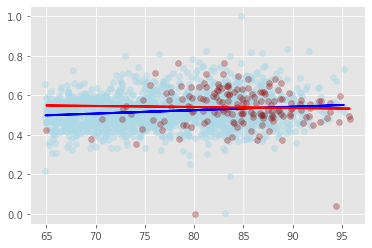

In [6]:
n = 30
print("bundle_measure :", all_figures[0][n])
print("abs diff (0-1) :", round(all_figures[2][n],3))
all_figures[1][n]

## Absolute Difference Generation - Z Score Normalization

In [7]:
scaler = StandardScaler()
all_figures_std = [list(),list(),list()]
bundle_measures_std = [list()]
comb_df = list()

for bundle in tqdm(all_bundles):
    for i in range(3,34):      
        if (i == 3):
            comb_df = bundle.copy() 
            
        label = bundle.columns[i]
        train_copy = bundle[bundle["group"] == "train"].copy()
        test_copy = bundle[bundle["group"] == "test"].copy()
        imput = SimpleImputer(missing_values=np.nan, strategy='mean')
        train_copy[label] = imput.fit_transform(train_copy[label].values.reshape(-1,1))
        test_copy[label]  = imput.transform(test_copy[label].values.reshape(-1,1))
    
        train_copy[label] = scaler.fit_transform(train_copy[label].values.reshape(-1,1))
        test_copy[label] = scaler.transform(test_copy[label].values.reshape(-1,1))
        #scaler.fit_transform(copy2[helper].values.reshape(-1,1))
    
        train_test = pd.concat([train_copy, test_copy], axis=0)
        comb_df[label] = train_test[label]
    
        if (i == 32):
            bundle_measures_std[0].append(comb_df)
                    
        x1 = train_test[train_test["dx"] == 1]["age"]
        x2 = train_test[train_test["dx"] == 2]["age"]
        y1 = train_test[train_test["dx"] == 1][label]
        y2 = train_test[train_test["dx"] == 2][label]
    
        z1 = np.polyfit(x1, y1, 1)
        z2 = np.polyfit(x2, y2, 1)

        y_hat1 = np.poly1d(z1)(x1)
        y_hat2 = np.poly1d(z2)(x2)
    
        temp_fig = plt.figure()
        plt.scatter(x1, y1, c = "lightblue", alpha = 0.5)
        plt.plot(x1, y_hat1, "b-", lw=2)
        plt.scatter(x2, y2, c = "darkred", alpha = 0.3)
        plt.plot(x2, y_hat2, "r-", lw=2)
        all_figures_std[0].append(label)
        all_figures_std[1].append(temp_fig)
        plt.close(temp_fig)
        
        x3 = x1.append(x2)
        y_h_1 = np.poly1d(z1)(x3)
        y_h_2 = np.poly1d(z2)(x3)
        diff = sum(abs(y_h_1-y_h_2))/len(y_h_2)
        all_figures_std[2].append(diff)


100%|██████████| 49/49 [01:20<00:00,  1.65s/it]


bundle_measure : b1_V30
abs diff (0-1) : 0.238


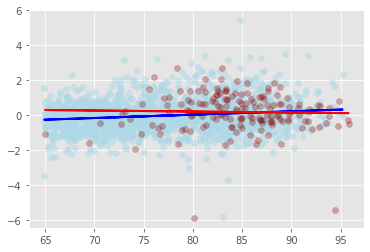

In [8]:
n = 29
print("bundle_measure :", all_figures_std[0][n])
print("abs diff (0-1) :", round(all_figures_std[2][n],3))
all_figures_std[1][n]

In [9]:
std_data = pd.concat([bundle_measures_std[0][0],bundle_measures_std[0][1],bundle_measures_std[0][2],
          bundle_measures_std[0][3],bundle_measures_std[0][4],bundle_measures_std[0][5],
          bundle_measures_std[0][6],bundle_measures_std[0][7],bundle_measures_std[0][8],
          bundle_measures_std[0][9],bundle_measures_std[0][10],bundle_measures_std[0][11],
          bundle_measures_std[0][12],bundle_measures_std[0][13],bundle_measures_std[0][14],
          bundle_measures_std[0][15],bundle_measures_std[0][16],bundle_measures_std[0][17],
          bundle_measures_std[0][18],bundle_measures_std[0][19],bundle_measures_std[0][20],
          bundle_measures_std[0][21],bundle_measures_std[0][22],bundle_measures_std[0][23],
          bundle_measures_std[0][24],bundle_measures_std[0][25],bundle_measures_std[0][26],
          bundle_measures_std[0][27],bundle_measures_std[0][28],bundle_measures_std[0][29],
          bundle_measures_std[0][30],bundle_measures_std[0][31],bundle_measures_std[0][32],
          bundle_measures_std[0][33],bundle_measures_std[0][34],bundle_measures_std[0][35],
          bundle_measures_std[0][36],bundle_measures_std[0][37],bundle_measures_std[0][38],
          bundle_measures_std[0][39],bundle_measures_std[0][40],bundle_measures_std[0][41],
          bundle_measures_std[0][42],bundle_measures_std[0][43],bundle_measures_std[0][44],
          bundle_measures_std[0][45],bundle_measures_std[0][46],bundle_measures_std[0][47],
          bundle_measures_std[0][48]], axis =1)
std_data.shape
std_data.to_csv('./data/standardized_data_2.csv', index=False)

#### Ex. Outputs (Z Score Normalization)

bundle_measure : b1_V2
abs diff (0-1) : 0.287


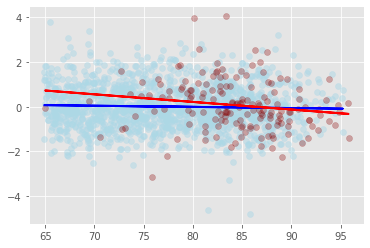

In [10]:
n = 1
print("bundle_measure :", all_figures_std[0][n])
print("abs diff (0-1) :", round(all_figures_std[2][n],3))
all_figures_std[1][n]

bundle_measure : b1_V31
abs diff (0-1) : 0.242


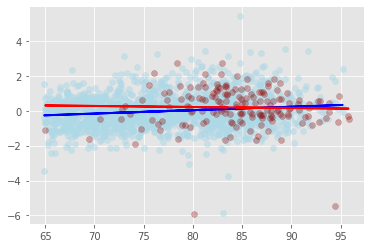

In [11]:
n = 30
print("bundle_measure :", all_figures_std[0][n])
print("abs diff (0-1) :", round(all_figures_std[2][n],3))
all_figures_std[1][n]

In [12]:
bundle_measures_std[0][0].head()

,age,dx,group,b1_V1,b1_V2,b1_V3,b1_V4,b1_V5,b1_V6,b1_V7,...,b1_V22,b1_V23,b1_V24,b1_V25,b1_V26,b1_V27,b1_V28,b1_V29,b1_V30,b1_V31
2126,76.7,1,test,-0.016474,-0.530372,-1.351957,0.890310,-0.324617,0.288523,0.005033,...,0.298752,-0.160668,0.106711,-0.288643,0.016059,-0.526463,-0.541803,-0.541365,-0.541467,-0.542170
1084,72.6,1,test,-0.532927,-1.873827,0.521126,-1.452230,-0.659170,0.148514,-0.648438,...,-1.706436,0.778543,-0.189350,1.228891,-2.616929,1.645085,1.622913,1.626648,1.628957,1.635477
1069,68.8,1,test,0.455116,0.041298,-1.517801,1.488654,-0.251765,0.543474,0.495430,...,-0.064149,-0.261831,-0.500445,-0.118535,-1.200578,-0.354955,-0.374976,-0.375101,-0.375601,-0.378332
190,72.8,1,test,1.375328,0.976977,0.000484,0.417443,0.189251,0.053175,0.354924,...,1.347946,-0.955281,-0.534304,-1.100681,1.214750,-0.323121,-0.309208,-0.312979,-0.316062,-0.321612
257,76.1,1,test,1.249355,-0.310190,0.313163,-0.516623,-0.775129,2.129207,2.085149,...,0.411221,-0.959599,-0.959707,-0.883205,-0.532678,0.296269,0.289430,0.283695,0.279530,0.273465


# Standardized (Z-Score) Component Dim Red - (feat based)

In [13]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pca = PCA(n_components = 1)
lda = LinearDiscriminantAnalysis()

comp_dim_red_pca = [list(),list(),list(),list(),list()]
comp_dim_red_lda = [list(),list(),list(),list(),list()]

pca_expl = [list(),list(),list(),list(),list()]
lda_expl = [list(),list(),list(),list(),list()]

for i in tqdm(range(0,49)): # 0,49
    label_shap = "b_" + np.str(i+1) + "_shape"
    label_lgth = "b_" + np.str(i+1) + "_length"
    label_volm = "b_" + np.str(i+1) + "_volumn"
    label_sfar = "b_" + np.str(i+1) + "_surfarea"
    label_micr = "b_" + np.str(i+1) + "_microstruc"
    
    bundle_train = (bundle_measures_std[0][i][bundle_measures_std[0][i]["group"] == "train"]).copy()
    bundle_test  = (bundle_measures_std[0][i][bundle_measures_std[0][i]["group"] == "test"]).copy()
    
    outs_train = bundle_train.iloc[:, [0,1,2]]
    shap_train = bundle_train.iloc[:, [3,6,7,15,18,21]]
    lgth_train = bundle_train.iloc[:, [4,5,8,13,20,17]]
    volm_train = bundle_train.iloc[:, [9,10,11]]
    sfar_train = bundle_train.iloc[:, [12,14,19,16]]
    micr_train = bundle_train.iloc[:, 22:34]
    
    outs_test = bundle_test.iloc[:, [0,1,2]]
    shap_test = bundle_test.iloc[:, [3,6,7,15,18,21]]
    lgth_test = bundle_test.iloc[:, [4,5,8,13,20,17]]
    volm_test = bundle_test.iloc[:, [9,10,11]]
    sfar_test = bundle_test.iloc[:, [12,14,19,16]]
    micr_test = bundle_test.iloc[:, 22:34]
    
    outs = (bundle_measures_std[0][i]).copy().iloc[:, [0,1,2]]
    
    principleComponents_shap_train = pca.fit_transform(shap_train)
    pca_expl[0].append(float(pca.explained_variance_ratio_))
    principleComponents_shap_test = pca.transform(shap_test)
    principleComponents_shap = np.concatenate((principleComponents_shap_train, 
                                               principleComponents_shap_test), axis=0)
    
    principleComponents_lgth_train = pca.fit_transform(lgth_train)
    pca_expl[1].append(float(pca.explained_variance_ratio_))
    principleComponents_lgth_test = pca.transform(lgth_test)
    principleComponents_lgth = np.concatenate((principleComponents_lgth_train, 
                                               principleComponents_lgth_test), axis=0)
    
    principleComponents_volm_train = pca.fit_transform(volm_train)
    pca_expl[2].append(float(pca.explained_variance_ratio_))
    principleComponents_volm_test = pca.transform(volm_test)
    principleComponents_volm = np.concatenate((principleComponents_volm_train, 
                                               principleComponents_volm_test), axis=0)
    
    principleComponents_sfar_train = pca.fit_transform(sfar_train)
    pca_expl[3].append(float(pca.explained_variance_ratio_))
    principleComponents_sfar_test = pca.transform(sfar_test)
    principleComponents_sfar = np.concatenate((principleComponents_sfar_train, 
                                               principleComponents_sfar_test), axis=0)
    
    principleComponents_micr_train = pca.fit_transform(micr_train)
    pca_expl[4].append(float(pca.explained_variance_ratio_))
    principleComponents_micr_test = pca.transform(micr_test)
    principleComponents_micr = np.concatenate((principleComponents_micr_train, 
                                               principleComponents_micr_test), axis=0)

    principleDF_shap = pd.DataFrame(data = principleComponents_shap, columns = [label_shap])
    principleDF_lgth = pd.DataFrame(data = principleComponents_lgth, columns = [label_lgth])
    principleDF_volm = pd.DataFrame(data = principleComponents_volm, columns = [label_volm])
    principleDF_sfar = pd.DataFrame(data = principleComponents_sfar, columns = [label_sfar])
    principleDF_micr = pd.DataFrame(data = principleComponents_micr, columns = [label_micr])
      
    comp_dim_red_pca[0].append(principleDF_shap)
    comp_dim_red_pca[1].append(principleDF_lgth)
    comp_dim_red_pca[2].append(principleDF_volm)
    comp_dim_red_pca[3].append(principleDF_sfar)
    comp_dim_red_pca[4].append(principleDF_micr)
    
    
    ldaComponents_shap_train = lda.fit_transform(shap_train, outs_train.iloc[:,[1]])
    lda_expl[0].append(lda.explained_variance_ratio_)
    ldaComponents_shap_test = lda.transform(shap_test)
    ldaComponents_shap = np.concatenate((ldaComponents_shap_train, 
                                         ldaComponents_shap_test), axis=0)

    ldaComponents_lgth_train = lda.fit_transform(lgth_train, outs_train.iloc[:,[1]])
    lda_expl[1].append(lda.explained_variance_ratio_)
    ldaComponents_lgth_test = lda.transform(lgth_test)
    ldaComponents_lgth = np.concatenate((ldaComponents_lgth_train, 
                                         ldaComponents_lgth_test), axis=0)
    
    ldaComponents_volm_train = lda.fit_transform(volm_train, outs_train.iloc[:,[1]])
    lda_expl[2].append(lda.explained_variance_ratio_)
    ldaComponents_volm_test = lda.transform(volm_test)
    ldaComponents_volm = np.concatenate((ldaComponents_volm_train, 
                                         ldaComponents_volm_test), axis=0)
    
    ldaComponents_sfar_train = lda.fit_transform(sfar_train, outs_train.iloc[:,[1]])
    lda_expl[3].append(lda.explained_variance_ratio_)
    ldaComponents_sfar_test = lda.transform(sfar_test)
    ldaComponents_sfar = np.concatenate((ldaComponents_sfar_train, 
                                         ldaComponents_sfar_test), axis=0)
    
    ldaComponents_micr_train = lda.fit_transform(micr_train, outs_train.iloc[:,[1]])
    lda_expl[4].append(lda.explained_variance_ratio_)
    ldaComponents_micr_test = lda.transform(micr_test)
    ldaComponents_micr = np.concatenate((ldaComponents_micr_train, 
                                         ldaComponents_micr_test), axis=0)
    
    ldaDF_shap = pd.DataFrame(data = ldaComponents_shap, columns = [label_shap])
    ldaDF_lgth = pd.DataFrame(data = ldaComponents_lgth, columns = [label_lgth])
    ldaDF_volm = pd.DataFrame(data = ldaComponents_volm, columns = [label_volm])
    ldaDF_sfar = pd.DataFrame(data = ldaComponents_sfar, columns = [label_sfar])
    ldaDF_micr = pd.DataFrame(data = ldaComponents_micr, columns = [label_micr])
    
    comp_dim_red_lda[0].append(ldaDF_shap)
    comp_dim_red_lda[1].append(ldaDF_lgth)
    comp_dim_red_lda[2].append(ldaDF_volm)
    comp_dim_red_lda[3].append(ldaDF_sfar)
    comp_dim_red_lda[4].append(ldaDF_micr)
    

100%|██████████| 49/49 [00:04<00:00, 10.82it/s]


In [14]:
pca_expl_df = pd.DataFrame(pca_expl).T.rename(columns={0:"shape_pca",1:"length_pca",2:"volumn_pca",
                                      3:"surface_area_pca", 4:"microstructure_pca"})
lda_expl_df = pd.DataFrame(lda_expl).T.rename(columns={0:"shape_tsne",1:"length_tsne",2:"volumn_tsne",
                                      3:"surface_area_tsne", 4:"microstructure_tsne"})
#lda_expl_df

In [15]:
comb_comp_dim_red_pca = []
comb_comp_dim_red_lda = []
dim_red_eval = []

pca_expl_df = pd.DataFrame(pca_expl).T.rename(columns={0:"shape_pca",1:"length_pca",2:"volumn_pca",
                                      3:"surface_area_pca", 4:"microstructure_pca"})
lda_expl_df = pd.DataFrame(lda_expl).T.rename(columns={0:"shape_tsne",1:"length_tsne",2:"volumn_tsne",
                                      3:"surface_area_tsne", 4:"microstructure_tsne"})
    
for i in range(0,5):
    comb_comp_dim_red_pca.append(pd.concat([comp_dim_red_pca[i][0],comp_dim_red_pca[i][1],comp_dim_red_pca[i][2],
                                            comp_dim_red_pca[i][3],comp_dim_red_pca[i][4],comp_dim_red_pca[i][5],
                                            comp_dim_red_pca[i][6],comp_dim_red_pca[i][7],comp_dim_red_pca[i][8],
                                            comp_dim_red_pca[i][9],comp_dim_red_pca[i][10],comp_dim_red_pca[i][11],
                                            comp_dim_red_pca[i][12],comp_dim_red_pca[i][13],comp_dim_red_pca[i][14],
                                            comp_dim_red_pca[i][15],comp_dim_red_pca[i][16],comp_dim_red_pca[i][17],
                                            comp_dim_red_pca[i][18],comp_dim_red_pca[i][19],comp_dim_red_pca[i][20],
                                            comp_dim_red_pca[i][21],comp_dim_red_pca[i][22],comp_dim_red_pca[i][23],
                                            comp_dim_red_pca[i][24],comp_dim_red_pca[i][25],comp_dim_red_pca[i][26],
                                            comp_dim_red_pca[i][27],comp_dim_red_pca[i][28],comp_dim_red_pca[i][29],
                                            comp_dim_red_pca[i][30],comp_dim_red_pca[i][31],comp_dim_red_pca[i][32],
                                            comp_dim_red_pca[i][33],comp_dim_red_pca[i][34],comp_dim_red_pca[i][35],
                                            comp_dim_red_pca[i][36],comp_dim_red_pca[i][37],comp_dim_red_pca[i][38],
                                            comp_dim_red_pca[i][39],comp_dim_red_pca[i][40],comp_dim_red_pca[i][41],
                                            comp_dim_red_pca[i][42],comp_dim_red_pca[i][43],comp_dim_red_pca[i][44],
                                            comp_dim_red_pca[i][45],comp_dim_red_pca[i][46],comp_dim_red_pca[i][47],
                                            comp_dim_red_pca[i][48]], axis = 1))

    
    comb_comp_dim_red_lda.append(pd.concat([comp_dim_red_lda[i][0],comp_dim_red_lda[i][1],comp_dim_red_lda[i][2],
                                            comp_dim_red_lda[i][3],comp_dim_red_lda[i][4],comp_dim_red_lda[i][5],
                                            comp_dim_red_lda[i][6],comp_dim_red_lda[i][7],comp_dim_red_lda[i][8],
                                            comp_dim_red_lda[i][9],comp_dim_red_lda[i][10],comp_dim_red_lda[i][11],
                                            comp_dim_red_lda[i][12],comp_dim_red_lda[i][13],comp_dim_red_lda[i][14],
                                            comp_dim_red_lda[i][15],comp_dim_red_lda[i][16],comp_dim_red_lda[i][17],
                                            comp_dim_red_lda[i][18],comp_dim_red_lda[i][19],comp_dim_red_lda[i][20],
                                            comp_dim_red_lda[i][21],comp_dim_red_lda[i][22],comp_dim_red_lda[i][23],
                                            comp_dim_red_lda[i][24],comp_dim_red_lda[i][25],comp_dim_red_lda[i][26],
                                            comp_dim_red_lda[i][27],comp_dim_red_lda[i][28],comp_dim_red_lda[i][29],
                                            comp_dim_red_lda[i][30],comp_dim_red_lda[i][31],comp_dim_red_lda[i][32],
                                            comp_dim_red_lda[i][33],comp_dim_red_lda[i][34],comp_dim_red_lda[i][35],
                                            comp_dim_red_lda[i][36],comp_dim_red_lda[i][37],comp_dim_red_lda[i][38],
                                            comp_dim_red_lda[i][39],comp_dim_red_lda[i][40],comp_dim_red_lda[i][41],
                                            comp_dim_red_lda[i][42],comp_dim_red_lda[i][43],comp_dim_red_lda[i][44],
                                            comp_dim_red_lda[i][45],comp_dim_red_lda[i][46],comp_dim_red_lda[i][47],
                                            comp_dim_red_lda[i][48]], axis = 1))

comp_dim_out_pca = pd.concat([outs.reset_index(), comb_comp_dim_red_pca[0], comb_comp_dim_red_pca[1],
                         comb_comp_dim_red_pca[2], comb_comp_dim_red_pca[3],
                         comb_comp_dim_red_pca[4]], axis =1).drop(["index"], axis=1)

comp_dim_out_lda = pd.concat([outs.reset_index(), comb_comp_dim_red_lda[0], comb_comp_dim_red_lda[1],
                         comb_comp_dim_red_lda[2], comb_comp_dim_red_lda[3],
                         comb_comp_dim_red_lda[4]], axis =1).drop(["index"], axis=1)

dim_red_eval = pd.concat((pca_expl_df,lda_expl_df),axis=1)

comp_dim_out_pca.to_csv('./data/component_pca_data.csv', index=False)
comp_dim_out_lda.to_csv('./data/component_lda_data.csv', index=False)
dim_red_eval.to_csv('./data/dim_red_evaluation.csv', index=False)

# Bundlewise Dim. Reduction - (PCA)

In [ ]:
pca = PCA(n_components = 2)
all_pca_bundles = [list(),list()]
for i in range(0,49):
    label = "b_" + np.str(i+1)
    all_pca_bundles[0].append(label)
    
    tester = (bundle_measures_std[0][i]).copy().dropna()
    minimum = (max(min(tester[tester["dx"] == 1]["age"]),min(tester[tester["dx"] == 2]["age"])))
    maximum = (min(max(tester[tester["dx"] == 1]["age"]),max(tester[tester["dx"] == 2]["age"])))
    tester = tester.loc[(tester["age"] >= minimum) & (tester["age"] <= maximum)]
    
    test_y = pd.DataFrame(tester.loc[:,['dx', 'age']].values, columns = ['dx', 'age'])
    test_x = tester.drop(['age','dx'], axis = 1)
    principleComponents = pca.fit_transform(test_x)
    principleDF = pd.DataFrame(data = principleComponents, columns = ['pc1','pc2'])
    final_df = pd.concat([test_y,principleDF], axis = 1)
    all_pca_bundles[1].append(final_df)

# Save PCA Output
#out = pd.DataFrame(all_pca_bundles)
#out.to_csv('./data/out_pca.csv', index=False, header=False)

#### Ex. Outputs (Bundlewise PCA)

In [ ]:
print("bundle :", all_pca_bundles[0][0])
print(all_pca_bundles[1][0])

#### Ex. Output (3D Scatter Plot)

In [ ]:
b_of_interest = 13

boi_data = all_pca_bundles[1][b_of_interest-1]
boi_name = all_pca_bundles[0][b_of_interest-1]
boi_alz = boi_data[boi_data["dx"] == 2.0]
boi_non = boi_data[boi_data["dx"] == 1.0]

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(boi_alz['age'], boi_alz['pc2'], boi_alz['pc1'], c='r', marker='o', alpha = 0.6)
ax.scatter(boi_non['age'], boi_non['pc2'], boi_non['pc1'], c='b', marker='o', alpha = 0.15)

ax.set_xlabel('age')
ax.set_ylabel('pc2')
ax.set_zlabel('pc1')
ax.set_title(("bundle: "+boi_name))

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(20, angle)
    plt.draw()
    plt.pause(.001)

## Bundlewise Dim. Reduction - (PCA : 1 Dim)

In [ ]:
plt.close(fig)
pca = PCA(n_components = 1)
all_pca_bundles_single = [list(),list(),list(),list()]
for i in range(0,49):
    label = "b_" + np.str(i+1)
    all_pca_bundles_single[0].append(label)
    
    tester = (bundle_measures_std[0][i]).copy().dropna()
    minimum = (max(min(tester[tester["dx"] == 1]["age"]),min(tester[tester["dx"] == 2]["age"])))
    maximum = (min(max(tester[tester["dx"] == 1]["age"]),max(tester[tester["dx"] == 2]["age"])))
    tester = tester.loc[(tester["age"] >= minimum) & (tester["age"] <= maximum)]
    
    test_y = pd.DataFrame(tester.loc[:,['dx', 'age']].values, columns = ['dx', 'age'])
    test_x = tester.drop(['age','dx'], axis = 1)
    principleComponents = pca.fit_transform(test_x)
    principleDF = pd.DataFrame(data = principleComponents, columns = ['pc'])
    final_df = pd.concat([test_y,principleDF], axis = 1)
    all_pca_bundles_single[1].append(final_df)
    
# Save PCA Output
#out = pd.DataFrame(all_pca_bundles)
#out.to_csv('./data/out_pca.csv', index=False, header=False)

In [ ]:
for i in range(0,49):
    boi_data = all_pca_bundles_single[1][i]
    boi_name = all_pca_bundles_single[0][i]
    boi_alz = boi_data[boi_data["dx"] == 2.0]
    boi_non = boi_data[boi_data["dx"] == 1.0]

    z1 = np.polyfit(boi_non["age"], boi_non["pc"], 1)
    z2 = np.polyfit(boi_alz["age"], boi_alz["pc"], 1)
    x3 = boi_alz["age"].append(boi_non["age"])

    y_hat1 = np.poly1d(z1)(boi_non["age"])
    y_hat2 = np.poly1d(z2)(boi_alz["age"])

    y_hat_1 = np.poly1d(z1)(x3)
    y_hat_2 = np.poly1d(z2)(x3)
    diff = sum(abs(y_hat_1-y_hat_2))/len(y_hat_2)

    temp_fig = plt.figure()
    plt.scatter(boi_non["age"], boi_non["pc"], c = "lightblue", alpha = 0.5)
    plt.plot(boi_non["age"], y_hat1, "b-", lw=2)
    plt.scatter(boi_alz["age"], boi_alz["pc"], c = "darkred", alpha = 0.3)
    plt.plot(boi_alz["age"], y_hat2, "r-", lw=2)
    
    all_pca_bundles_single[2].append(temp_fig)
    all_pca_bundles_single[3].append(diff)
    
    plt.close(temp_fig)
    
# Save PCA Output
#out = pd.DataFrame(all_pca_bundles_single)
#out.to_csv('./data/out_pca_single.csv', index=False, header=False)

In [ ]:
print("Bundle   :", all_pca_bundles_single[0][12])
print("Abs Diff :", round(all_pca_bundles_single[3][12],2))
all_pca_bundles_single[2][12]

In [ ]:
# Save PCA Output
#out = pd.DataFrame(all_pca_bundles_single)
#out.to_csv('./data/out_pca_single.csv', index=False, header=False)